In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from numba import jit
nside = 4
from mpl_toolkits import mplot3d
from matplotlib import ticker

from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})

In [16]:
def plot_asymptotic_surface(fileN):
    fileL = np.load("../src/results/"+fileN)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    xpos = fileL[:,18]
    ypos = fileL[:,19]
    zpos = fileL[:,20]
    
    ax.scatter(xpos, ypos, zpos, marker='o', s=10, c='k', alpha=.1)
    ax.scatter(0,0,0, marker="*", s=20, c='r')
    ax.scatter(0,-8e12,0, marker="*", s=500, c='c')
    # ax.scatter(0,-1e7,0, marker="*", s=500, c='c')
    ax.view_init(20, 30)
    maxV=1e6
    ax.set_zlim([-1e13, 1e13])
    ax.set_xlim([-maxV, maxV])
    #ax.set_ylim([-1e8, 1e8])
    ax.set_ylim([-maxV, maxV])

    # ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');
def plot_asymptotic_surface_theta(fileN, theta_min, theta_max, maxR=1):
    fileL = np.load("../src/results/"+fileN)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    
    file_hits = fileL[:, 8:8+3] 

    thetaVS = np.arccos(file_hits[:, -1] / np.sqrt(np.sum(file_hits**2, axis=1)))
    
    condition1 = thetaVS>theta_min
    condition2 = thetaVS<theta_max
    jointC1 = np.all(np.column_stack((condition1, condition2)), axis=1)
    file_short_1 = fileL[jointC1]

    xpos = file_short_1[:,18]
    ypos = file_short_1[:,19]
    zpos = file_short_1[:,20]
    
    ax.scatter(xpos, ypos, zpos, marker='o', s=10, c='k', alpha=.1)
    ax.scatter(0,0,0, marker="*", s=20, c='r')
    ax.scatter(0,-8e12,0, marker="*", s=500, c='c')
    # ax.scatter(0,-1e7,0, marker="*", s=500, c='c')
    ax.view_init(20, 30)
    maxV=1e8
    ax.set_zlim([-1e13, 1e13])
    ax.set_xlim([-maxV, maxV])
    #ax.set_ylim([-1e8, 1e8])
    ax.set_ylim([-maxV, maxV])

    zcent = np.median(zpos)
    phiV = np.linspace(0, 2*np.pi, 1000)
    ax.scatter(maxR * np.cos(phiV), maxR * np.sin(phiV), zcent*np.ones_like(phiV), marker='o', s=10, c='r', alpha=.1)

    # ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

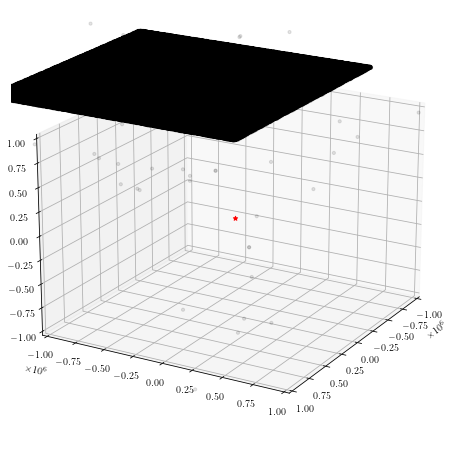

In [17]:
#fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_1000000_NS_Mag_0.00067_NS_Theta_3.142_Mmc_1.0e-12_Rmc_5280.0___AxionStar_LowThresh1e-4__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_1000000_NS_Mag_0.00067_NS_Theta_3.142_Mmc_1.0e-10_Rmc_3.0e9___AMC_NoTrace__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
#fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_3000000_NS_Mag_0.00067_NS_Theta_-1.571_Mmc_1.0e-10_Rmc_3.06e9___fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
plot_asymptotic_surface(fileN)

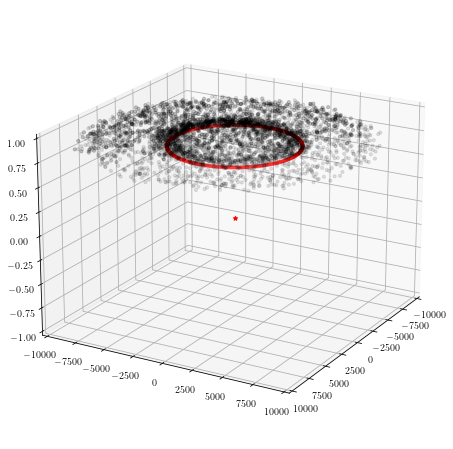

In [64]:
#fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_1000000_NS_Mag_0.00067_NS_Theta_3.142_Mmc_1.0e-12_Rmc_5280.0___AxionStar_LowThresh1e-4__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_10000_NS_Mag_0.00067_NS_Theta_3.142_Mmc_1.0e-12_Rmc_5280.0___Trace__fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
#fileN = "Minicluster__MassAx_1.0e-5_ThetaM_0.0_rotPulsar_6.283_B0_1.0e14_rNS_10_MassNS_1_Ntrajs_3000000_NS_Mag_0.00067_NS_Theta_-1.571_Mmc_1.0e-10_Rmc_3.06e9___fixed_time_0.0_odeErr_1.0e-5_vxNS_0_vyNS_0_vzNS_0_.npz"
plot_asymptotic_surface_theta(fileN, 0, np.pi/2, maxR=5e3)